# Surprise House Assignment

**Problem Statement :**


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
​
 
​
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
​
 

_The company wants to know the following things about the prospective properties:_

- Which variables are significant in predicting the price of a house, and
​
- How well those variables describe the price of a house.
​
 
​
Also, determine the optimal value of lambda for ridge and lasso regression.

__Business Goal__

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm


# for model evaluation
from sklearn.metrics import r2_score, mean_squared_error



# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#setting maximum display rows and columns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
# Reading the data from the given dataset file
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Identify No. of rows & columns
housing.shape

(1460, 81)

In [7]:
# Identify the duplicate rows
housing.duplicated().any()

False

**The dataset doesn't have any duplicate row.**

In [8]:
#columns info about dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Overall Stastics of the dataset
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [10]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
# Separating the Numerical and Categorical features for analysis
numerical_df = housing.select_dtypes(include=['int64', 'float64'])
numerical_df.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500


In [12]:
numerical_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
categorical_df = housing.select_dtypes(include=['object'])
categorical_df.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [14]:
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Analyze numerical_df

 checking percentage of outliers in the numerical_df

In [16]:
outliers_percentage={}

for feature in numerical_df.columns:
    IQR=numerical_df[feature].quantile(.75)-numerical_df[feature].quantile(.25)
    outliers_count=numerical_df[(numerical_df[feature]>(numerical_df[feature].quantile(.75)+1.5*IQR)) | (numerical_df[feature]<(numerical_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numerical_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


- Most of the numerical_df has outliers.
- Instead of removing those outliers we will replace it with the numerical_df[feature].quantile(0.75)+1.5* IQR for max value 
  numerical_df[feature].quantile(0.25)-1.5* IQR as min value.
  

In [17]:
numerical_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [18]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing[feature].quantile(.75) - housing[feature].quantile(.25) 
        max_value = housing[feature].quantile(.75)+1.5*IQR
        min_value = housing[feature].quantile(.25)-1.5*IQR
        housing[feature][housing[feature] > max_value] = max_value
        housing[feature][housing[feature] < min_value ] = min_value      

In [19]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,0.0,563.777740,1050.254795,1157.018151,346.789041,0.0,1503.735873,0.425000,0.0,1.565068,0.382877,2.851712,1.0,6.487671,0.611301,1978.506164,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,0.0,431.710214,397.937878,362.583002,435.791621,0.0,481.375641,0.517373,0.0,0.550916,0.502885,0.759516,0.0,1.541916,0.638959,24.689725,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,0.0,0.000000,42.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.0,223.000000,795.750000,882.000000,0.000000,0.0,1129.500000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.0,477.500000,991.500000,1087.000000,0.000000,0.0,1464.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.0,808.000000,1298.250000,1391.250000,728.000000,0.0,1776.750000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,0.0,1685.500000,2052.000000,2155.125000,1820.000000,0.0,2747.625000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,2010.000000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


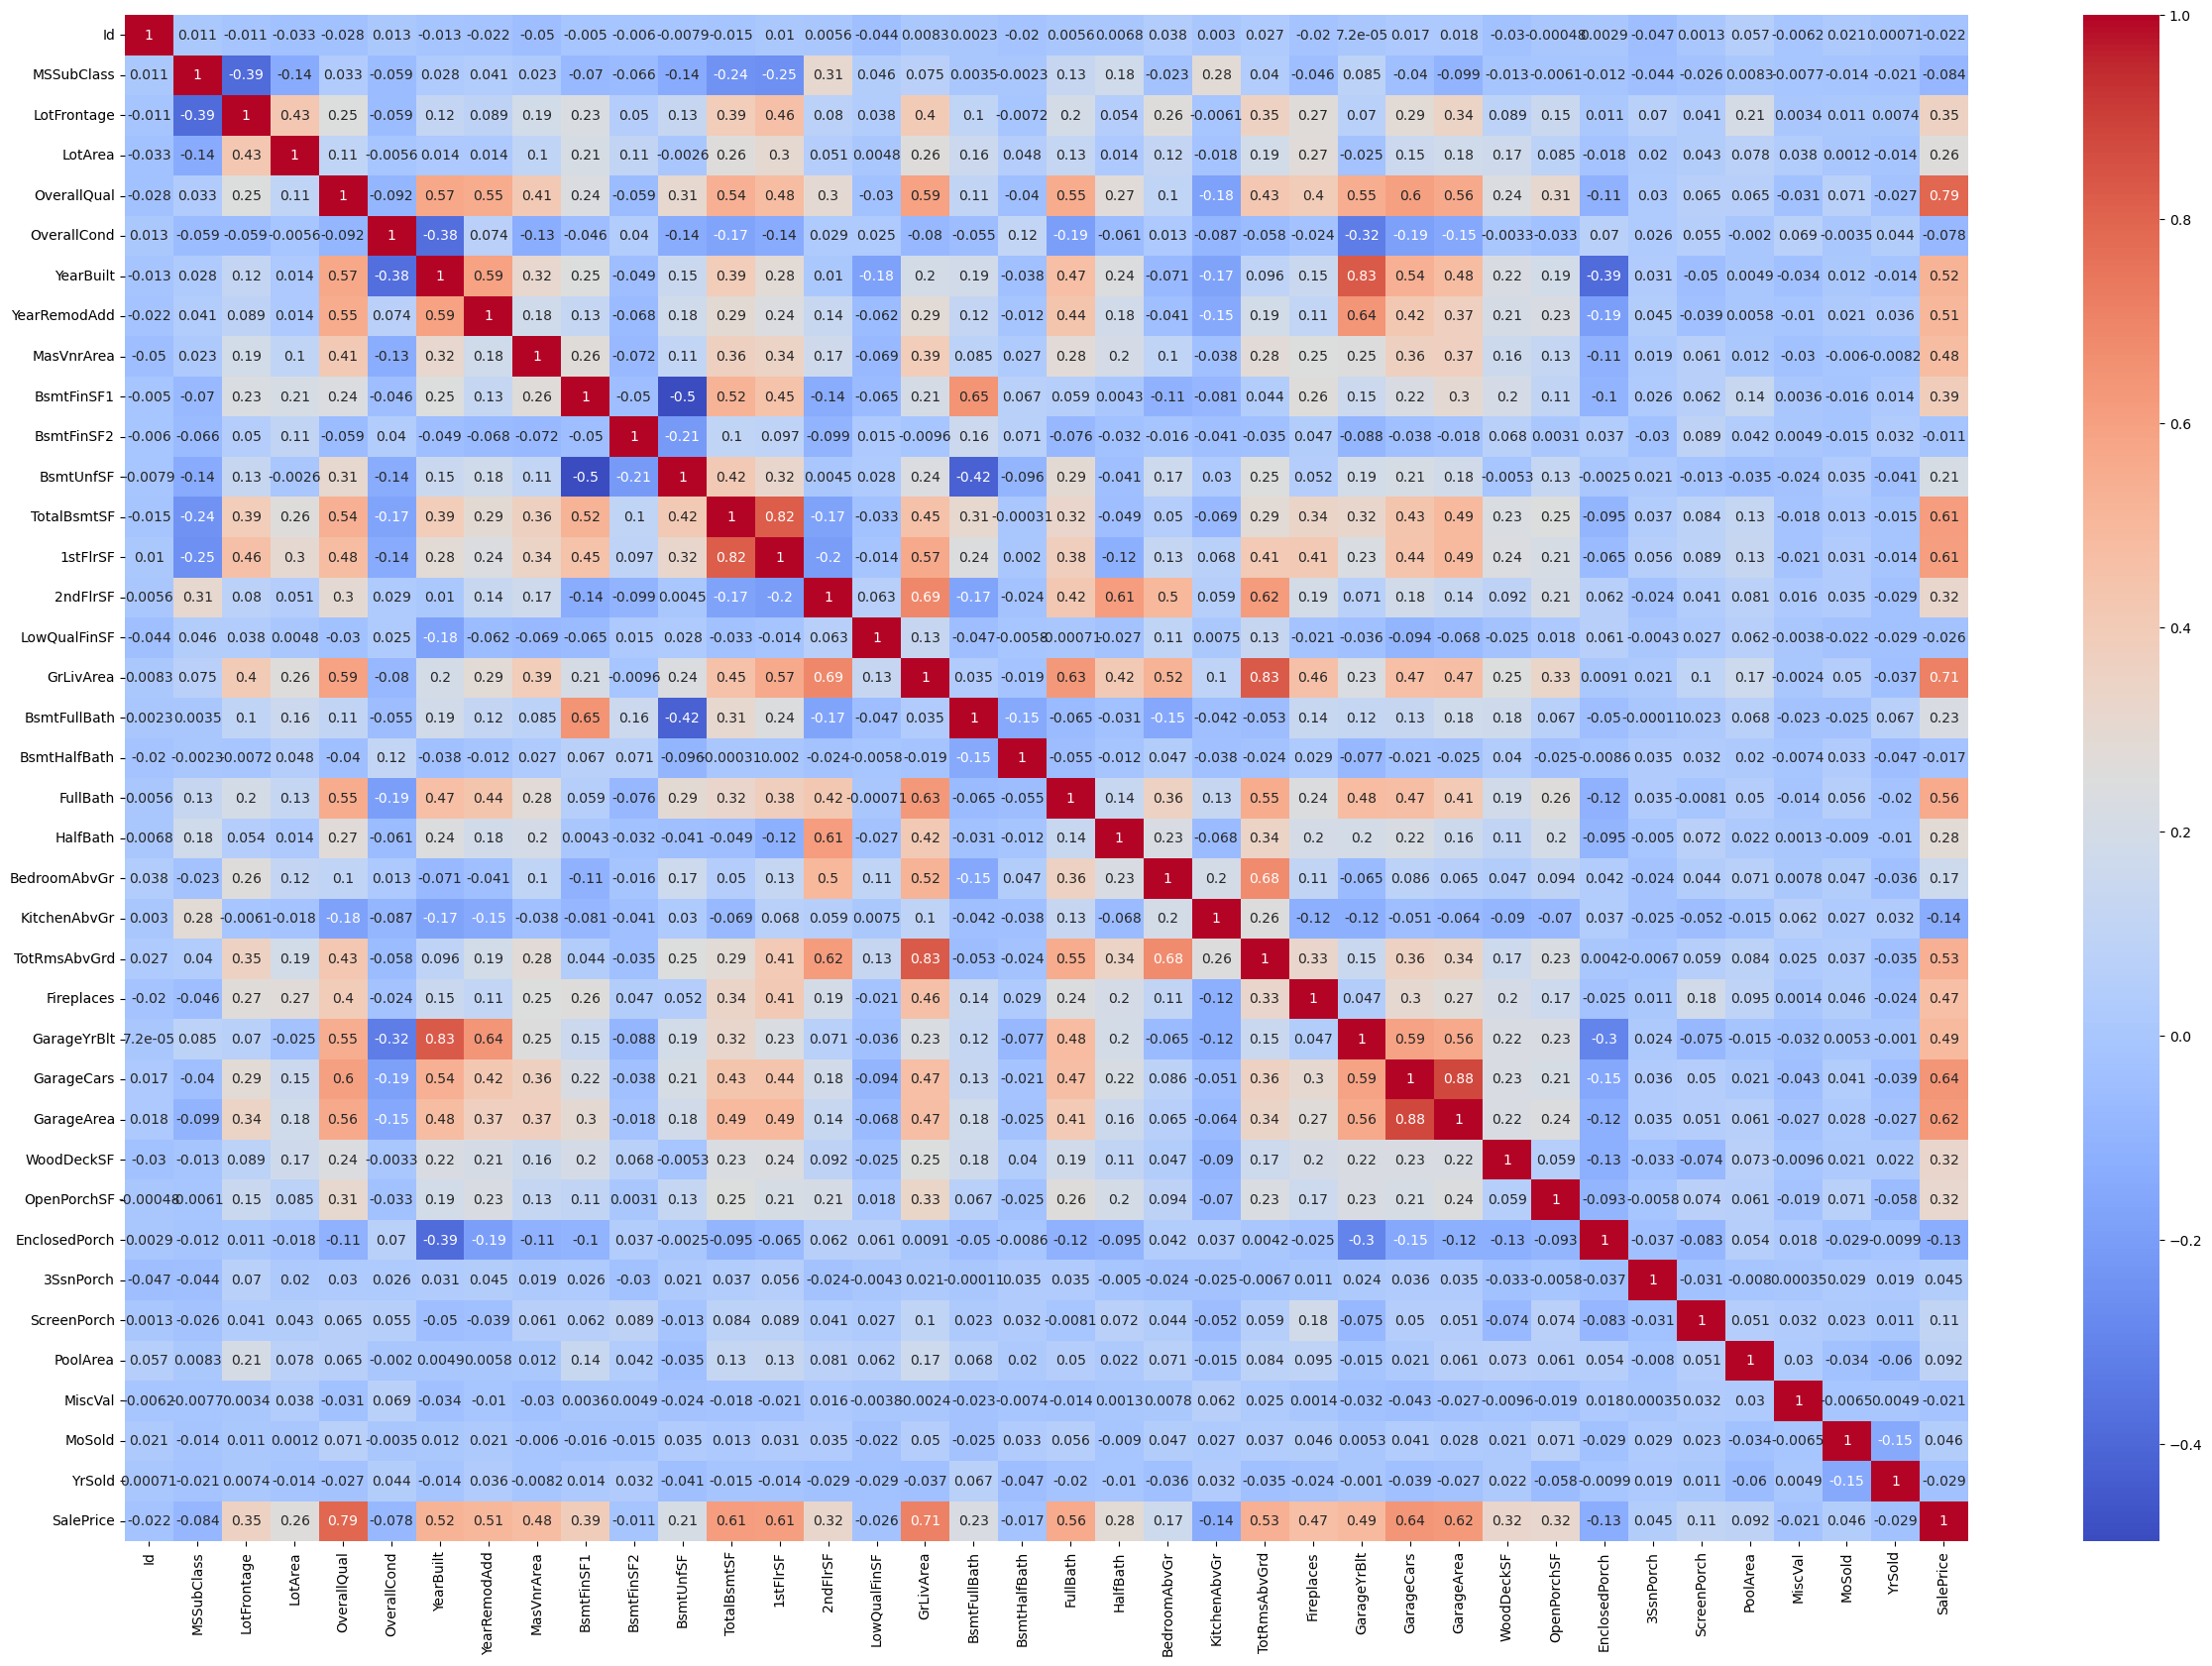

In [20]:
plt.figure(figsize=(30,20))
sns.heatmap(numerical_df.corr(),cmap='coolwarm',annot=True)
plt.show()

**Comment**
- Some of the features have high correlation with each other
- GarageCars and GarageArea (0.88)
- GarageYrBlt and YearBuilt (0.83)
- TotRmsAbvGrd and GrLivArea (0.83)
- TotalBsmtSF and 1stflrSF (0.82)

In [21]:
housing[['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,BsmtFinSF2,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#
housing.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],inplace=True, axis=1)

In [23]:
housing.shape

(1460, 72)

In [24]:
numerical_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

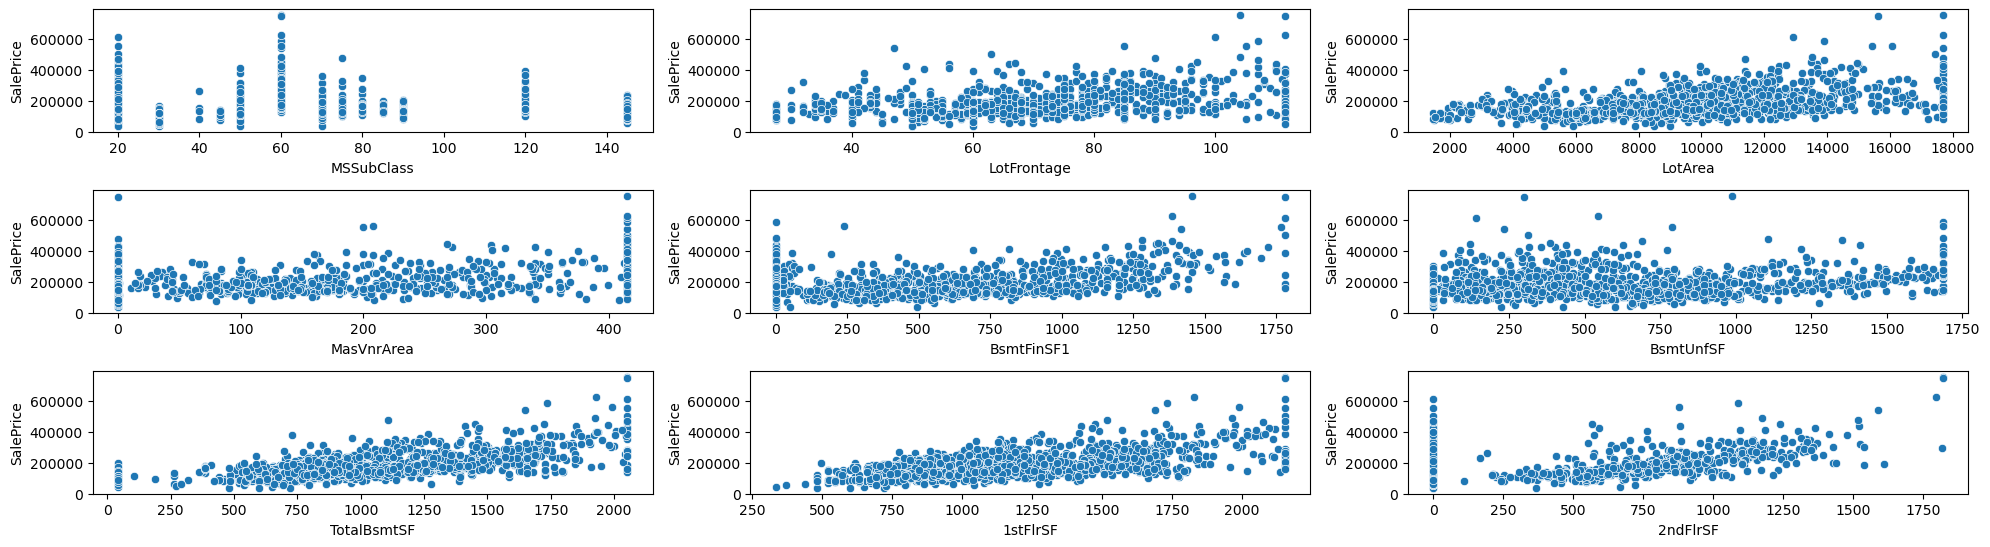

In [25]:
fig=plt.subplots(figsize=(20, 16))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 5.0)
    sns.scatterplot(data=housing, x=feature,y='SalePrice')
    plt.tight_layout()

- MSSubClass has discrete values.
- LotFrontage, LotArea, TotalBsmtSF, 1stFlrSF, 2ndFlrSF has a positive relation.

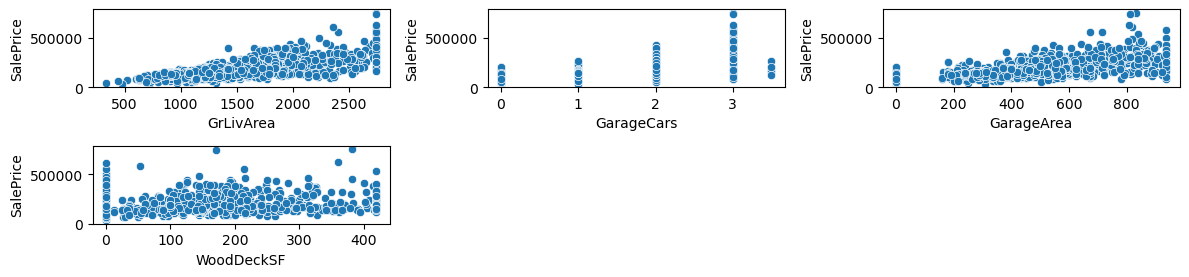

In [26]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate([ 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(data=housing, x=feature,y='SalePrice')
    plt.tight_layout()

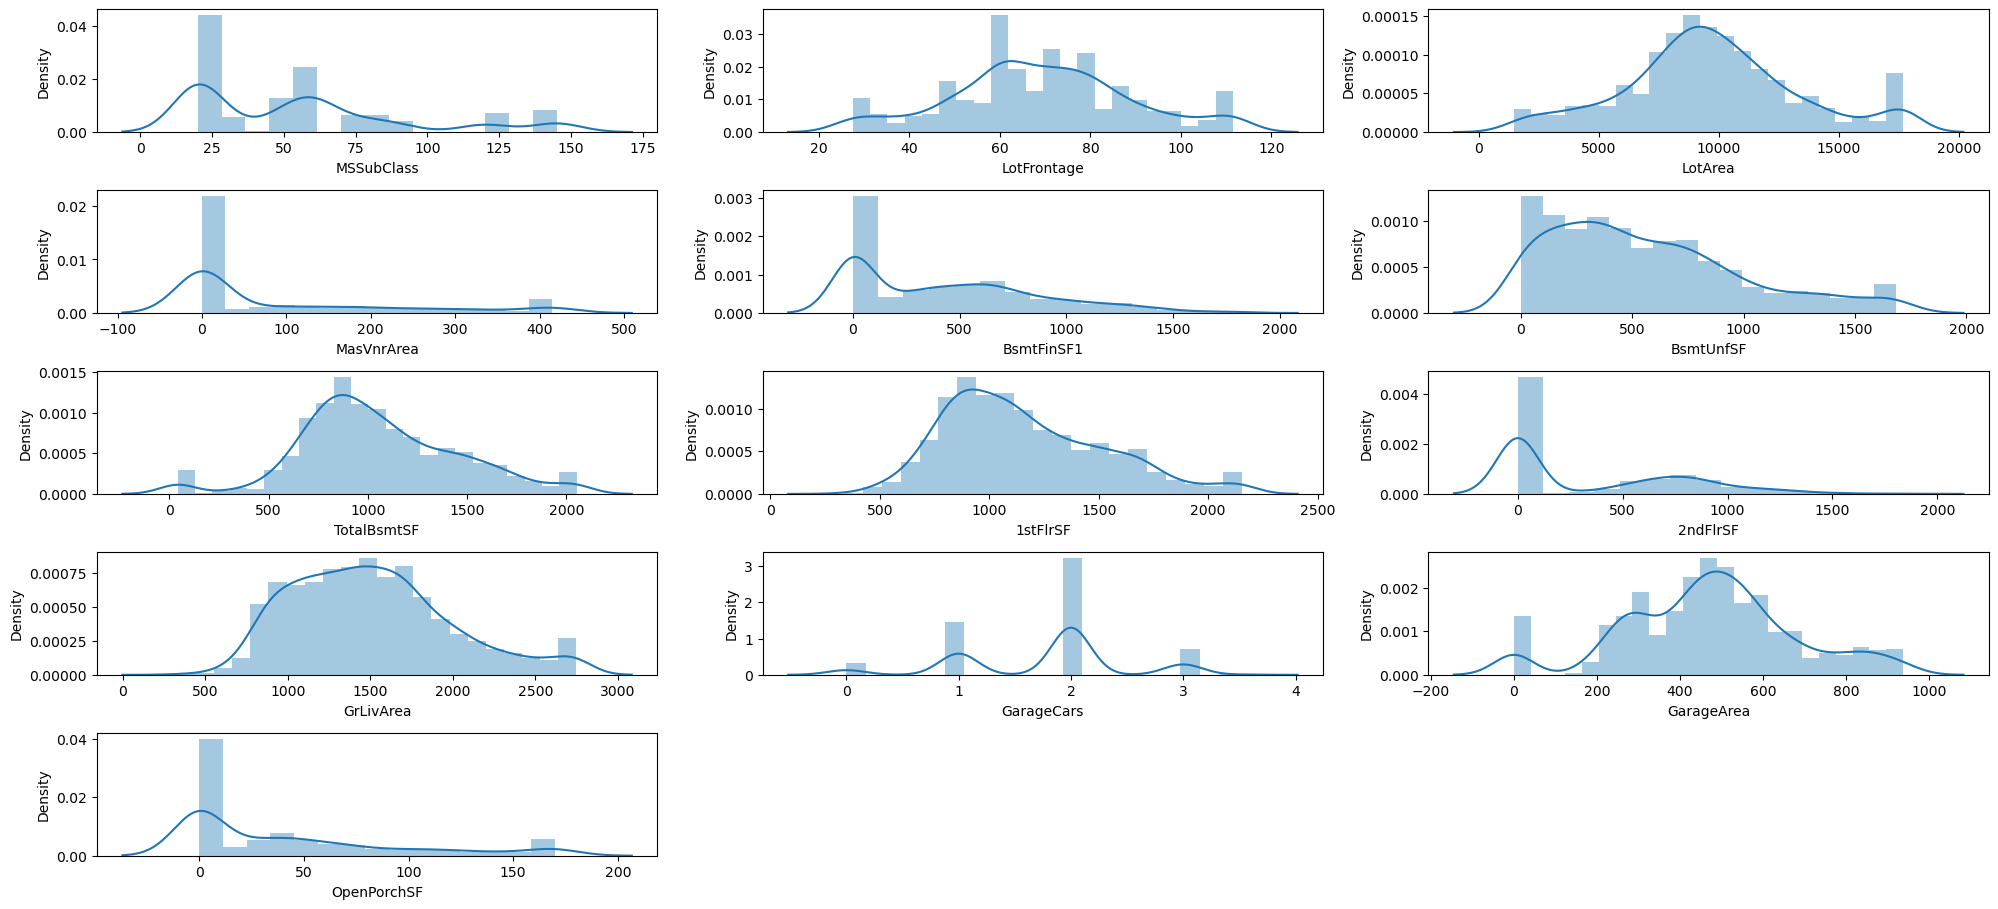

In [27]:
fig=plt.subplots(figsize=(20, 16))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(housing[feature])
    plt.tight_layout()

In [28]:
housing[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1379.000000,1460.000000,1460.000000,1460.000000
mean,1978.506164,1971.299315,1984.865753,2007.815753
std,24.689725,30.108397,20.645407,1.328095
min,1900.000000,1885.000000,1950.000000,2006.000000
25%,1961.000000,1954.000000,1967.000000,2007.000000
50%,1980.000000,1973.000000,1994.000000,2008.000000
75%,2002.000000,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [29]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    housing[feature] = 2023 - housing[feature]

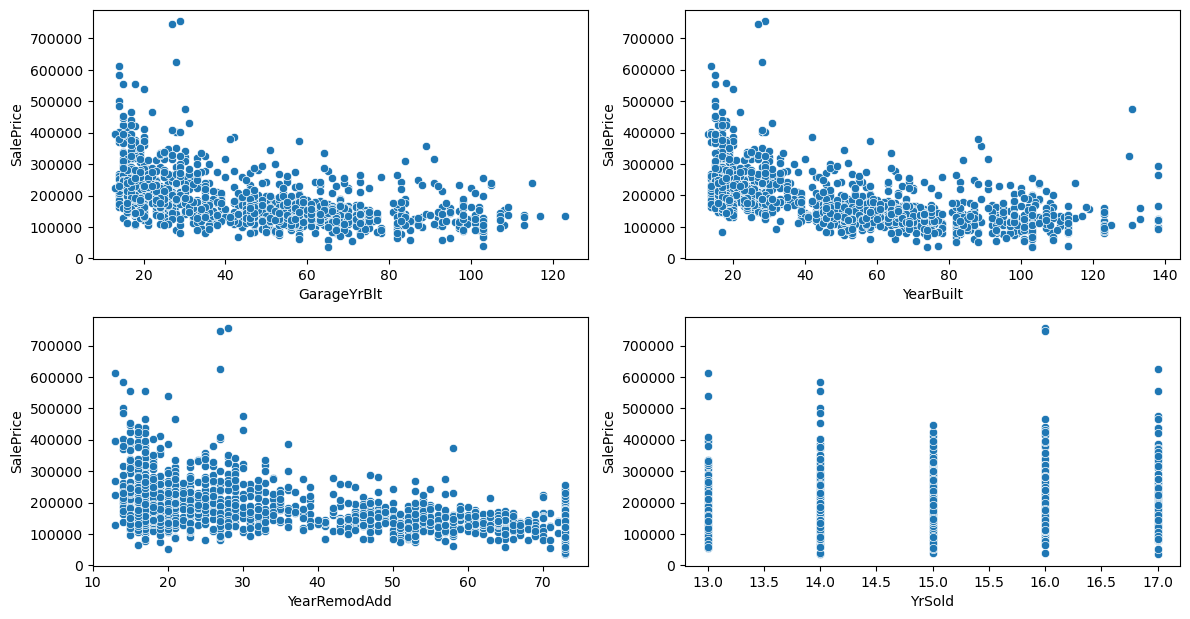

In [30]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(data=housing, x=feature,y='SalePrice')
    plt.tight_layout()

## Missing Value Handling

In [31]:
#check missing values again
numerical_df.isnull().sum()[numerical_df.isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [32]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not contribute towards predicting SalePrice

housing = housing[~housing['MasVnrArea'].isnull()]


In [33]:
housing.drop('Id', axis=1, inplace=True)
numerical_df.drop('Id', axis=1, inplace=True)

In [34]:
# Checking the number of remaining columns
housing.shape

(1452, 71)


- GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars
- GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value
- TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea
- TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF

In [35]:
housing.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(housing.columns.shape)

(67,)


## Analyzing categorical_df

In [36]:
# Categorical features in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [37]:
categorical_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [38]:
for category in categorical_df:
    print(category, ':', categorical_df[category].nunique())
    print(category, ':', categorical_df[category].unique())
    print('-----------------------------------------------')

MSZoning : 5
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
-----------------------------------------------
Street : 2
Street : ['Pave' 'Grvl']
-----------------------------------------------
Alley : 2
Alley : [nan 'Grvl' 'Pave']
-----------------------------------------------
LotShape : 4
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
-----------------------------------------------
LandContour : 4
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
-----------------------------------------------
Utilities : 2
Utilities : ['AllPub' 'NoSeWa']
-----------------------------------------------
LotConfig : 5
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
-----------------------------------------------
LandSlope : 3
LandSlope : ['Gtl' 'Mod' 'Sev']
-----------------------------------------------
Neighborhood : 25
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 

In [39]:
print("Feature : Percentage of Missing Value")
for feat in housing.select_dtypes(include=['object']).columns:
    if housing[feat].isnull().any():
        print(feat, ':', round(housing[feat].isnull().sum()/housing.shape[0], 2)*100)

Feature : Percentage of Missing Value
Alley : 94.0
MasVnrType : 60.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


In [40]:
housing['Electrical'].isnull().sum()

1

In [41]:
housing['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

**comment**
- For 'Alley', Nan means 'No access to alley'
- For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
- For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
- For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
- MiscFeature - Nan means no additional features mentioned.


In [42]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(housing[mv_categorical_features].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


In [43]:
# Imputing missing values with "Not_applicable"
housing[mv_categorical_features] = housing[mv_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(housing[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [44]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
housing.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
housing.dropna(subset=['Electrical'], inplace=True)

In [45]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing.columns:
    if housing[feat].isnull().any():
        print(feat, ':', round(housing[feat].isnull().sum()/housing.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0
MasVnrType : 59.0


In [46]:
housing.columns.shape

(66,)

#### Encoding Categorical Variables

**Encoding For Categorical Variables**
**Ordered Features -- to be label encoded**
'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual',
'GarageCond', 'CentralAir'

**Unordered Features -- to be one hot encoded**
'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

In [47]:
#convert Lotshape 0,1,2,3 -> IR1, IR2, IR3, Reg
housing['LotShape'] = housing['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

#convert Utilities 0,1,2,3 -> ELO, NoSewa, NoSewr, AllPub
housing['Utilities'] = housing['Utilities'].map({'ELO':0, 'NoSeWa':1, 'NoSewr':2, 'AllPub':3, })

#convert LandSlope 0,1,2 -> Gtl, Mod, Sev
housing['LandSlope'] = housing['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})

#convert HouseStyle 0,1,2,3,4,5,,6,7 -> 1Story, 1.5Unf, 1.5Fin, 2Story, 2.5Unf, 2.5Fin, SFoyer, SLvl, 
housing['HouseStyle'] = housing['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})

#convert ExterQual 0,1,2,3,4 -> Po, Fa, TA, Gd, Ex
housing['ExterQual'] = housing['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

#convert exterCond 0,1,2,3,4 ->Po, Fa, TA, Gd, Ex
housing['ExterCond'] = housing['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

#convert BsmtQual 0,1,2,3,4,5 -> Not_applicable, Po, Fa, TA, Gd, Ex
housing['BsmtQual'] = housing['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

#convert BsmtCondl 0,1,2,3,4,5 -> Not_applicable, Po, Fa, TA, Gd, Ex
housing['BsmtCond'] = housing['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

#convert BsmtExposure 0,1,2,3,4 -> Not_applicable, Po, Fa, TA, Gd
housing['BsmtExposure'] = housing['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})

#convert BsmtFinType1 0,1,2,3,4,5,6 -> Not_applicable, Unf, LwQ, Rec, BLQ, ALQ, GLQ 
housing['BsmtFinType1'] = housing['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

#convert BsmtFinType2 0,1,2,3,4,5,6 -> Not_applicable, Unf, LwQ, Rec, BLQ, ALQ, GLQ 
housing['BsmtFinType2'] = housing['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

#convert HeatingQC 0,1,2,3,4 ->Po, Fa, TA, Gd, Ex
housing['HeatingQC'] = housing['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

#convert CentralAir 0,1 ->N, Y
housing['CentralAir'] = housing['CentralAir'].map({'N':0,'Y':1})

#convert KitchenQual 0,1,2,3,4 ->Po, Fa, TA, Gd, Ex
housing['KitchenQual'] = housing['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

#convert KitchenQual 0,1,2,3 -> Not_applicable, Unf, RFn, Fin
housing['GarageFinish'] = housing['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})

#convert GarageQual 0,1,2,3,4,5 -> Not_applicable, Po, Fa, TA, Gd, Ex
housing['GarageQual'] = housing['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

#convert GarageCond 0,1,2,3,4,5 -> Not_applicable, Po, Fa, TA, Gd, Ex
housing['GarageCond'] = housing['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

#convert Functional 0,1,2,3,4,5 ,6,7-> Typ, Min1, Min2, Mod, Maj1, Maj2, Sev, Sal
housing['Functional'] = housing['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})

#convert FireplaceQu 0,1,2,3,4,5 -> Not_applicable, Po, Fa, TA, Gd, Ex
housing['FireplaceQu'] = housing['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [48]:
# Checking the features after encoding

housing[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
dtypes: int64(18)
memory usage: 215.4 KB


In [49]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

In [50]:
dummy_df = pd.get_dummies(housing[unordered_features], drop_first=True)

In [51]:
dummy_df.shape

(1451, 143)

**Comment:**

- Adding 143 features to the existing dataset will make the model very complex.
- From the above boxplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [52]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Street_Pave', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_A

In [53]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 46)


In [54]:
housing.shape

(1451, 66)

In [55]:
# Adding the dummy variables to the original dataframe
housing = pd.concat([housing,dummy_df],axis=1)

# Dropping the redundant columns
housing = housing.drop(unordered_features,axis=1)

In [56]:
housing.shape

(1451, 89)

### Splitting into Train and Test Data

In [57]:
X = housing.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSZoning_RL,MSZoning_RM,Alley_Not_applicable,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,20,20,196.0,3,2,4,3,1,6,706.0,1,150.0,4,1,856.0,854,1.0,2,1,3.0,3,8,0,0.0,0,2,548.0,3,3,0,61,2,15,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,True,True,False,False,False,True,False,True,False,True,True,False
1,20,80.0,9600.0,3,3,0,0,6,7.5,47,47,0.0,2,2,4,3,4,5,978.0,1,284.0,4,1,1262.0,0,0.0,2,0,3.0,2,6,0,1.0,3,2,460.0,3,3,298,0,5,16,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False,False,True,False,True,False,True,True,False
2,60,68.0,11250.0,0,3,0,3,7,5.0,22,21,162.0,3,2,4,3,2,6,486.0,1,434.0,4,1,920.0,866,1.0,2,1,3.0,3,6,0,1.0,3,2,608.0,3,3,0,42,9,15,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,True,True,False,False,False,True,False,True,False,True,True,False
3,70,60.0,9550.0,0,3,0,3,7,5.0,108,53,0.0,2,2,3,4,1,5,216.0,1,540.0,3,1,961.0,756,1.0,1,0,3.0,3,7,0,1.0,4,1,642.0,3,3,0,35,2,17,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False,False
4,60,84.0,14260.0,0,3,0,3,8,5.0,23,23,350.0,3,2,4,3,3,6,655.0,1,490.0,4,1,1145.0,1053,1.0,2,1,4.0,3,9,0,1.0,3,2,836.0,3,3,192,84,12,15,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,True,True,False,False,False,True,False,True,False,True,True,False


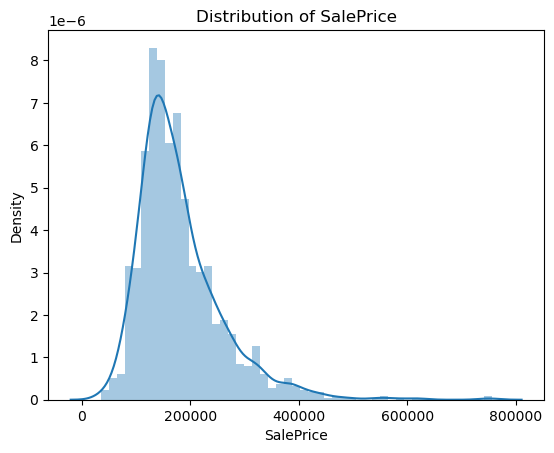

In [58]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing['SalePrice'])
plt.show()

**Comment:** Since SalePrice is highly right skewed,  checking the distribution of transformed SalePrice. 

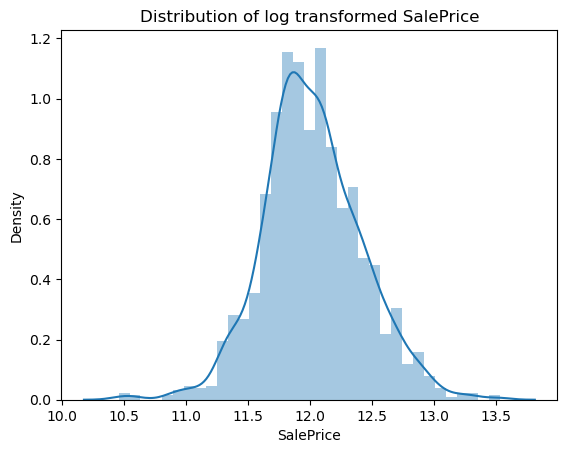

In [59]:
sns.distplot(np.log(housing['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [60]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(housing['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1451, dtype: float64


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1015, 88)
(436, 88)
(1015,)
(436,)


In [63]:
X['LotFrontage'].isnull().any()

True

In [64]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [65]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [66]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

### Feature Scaling

In [67]:
X_train.values

array([[30, 60.0, 7200.0, ..., True, False, False],
       [30, 71.0, 6900.0, ..., True, True, False],
       [20, 69.34880952380952, 17600.0, ..., True, True, False],
       ...,
       [50, 50.0, 9000.0, ..., True, True, False],
       [20, 48.0, 10635.0, ..., True, True, False],
       [20, 67.0, 10656.0, ..., False, False, True]], dtype=object)

In [68]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [69]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [70]:
# Checking the features after 

print(X_tr_scaled) # train data
print(X_te_scaled) # test data

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.674744    -0.525003 -0.675766  0.747890   0.031404  -0.228201   
1      -0.674744     0.092726 -0.759996  0.747890   0.031404  -0.228201   
2      -0.944588     0.000000  2.244208 -1.386436   0.031404  -0.228201   
3      -0.944588     0.317355 -0.591536  0.747890   0.031404  -0.228201   
4       1.753855     0.000000 -1.659572  0.747890   0.031404  -0.228201   
...          ...          ...       ...       ...        ...        ...   
1010    0.134789     0.654298  0.375425 -1.386436   0.031404  -0.228201   
1011    2.428466    -2.350112 -2.249183  0.747890   0.031404  -0.228201   
1012   -0.135055    -1.086575 -0.170386  0.747890   0.031404  -0.228201   
1013   -0.944588    -1.198889  0.288668 -0.674994   0.031404  -0.228201   
1014   -0.944588    -0.131903  0.294564 -1.386436   0.031404  -0.228201   

      HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0      -0.851984    -0.78150

### Initial Feature Selection with RFE

In [71]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    lm = LinearRegression()
    lm.fit(X_tr_scaled, y_train)
    rfe = RFE(lm, n_features_to_select=n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [72]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'Heati

In [73]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train.values.reshape(-1,1), X_train_sm).fit()
    print(lm.summary())  

In [74]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     217.4
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:07:04   Log-Likelihood:                 736.11
No. Observations:                1015   AIC:                            -1380.
Df Residuals:                     969   BIC:                            -1154.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [75]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     197.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:07:05   Log-Likelihood:                 742.10
No. Observations:                1015   AIC:                            -1382.
Df Residuals:                     964   BIC:                            -1131.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [76]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     180.1
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:07:06   Log-Likelihood:                 746.61
No. Observations:                1015   AIC:                            -1381.
Df Residuals:                     959   BIC:                            -1106.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Comment:** 

By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 50 and 55 features have the same adjusted R-squared value on the training data.

In [77]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

In [78]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

## Ridge Regression 

In [79]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Optimum alpha for ridge is 8.000000
ridge  Regression with  8.0
R2 score (train) :  0.9108346320159204
R2 score (test) :  0.8923709619116433
RMSE (train) :  0.11655087882916124
RMSE (test) :  0.13749900186007846


**Comment:** 

Ridge Regression model was able to achieve R2 score of 0.89 on test data i.e. 89% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.1374 on test data, that means the prediction made by the model can off by 0.1374 unit.

## Lasso Regression

In [80]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9095688057220723
R2 score (test) :  0.895185968061579
RMSE (train) :  0.11737526415258312
RMSE (test) :  0.13568896502056996


In [82]:
### Comparing Model Coefficients
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=8.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=8.0),Lasso (alpha=0.001)
LotFrontage,0.007462,0.005671
LotArea,0.027413,0.028769
LandSlope,0.014659,0.013501
OverallQual,0.073681,0.075222
OverallCond,0.051305,0.052360
YearBuilt,-0.045219,-0.046505
ExterQual,0.010172,0.010861
BsmtQual,0.022798,0.022468
BsmtExposure,0.011544,0.010920
BsmtFinSF1,0.027136,0.026723


In [83]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[292913 227743 136003 118272 148889]


# Final Model
- Lasso Regression produced slightly r2 score on test data than Ridge Regression. Choosing Lasso as the final model.
- Lasso Regression gave us a simpler model with more  coefficients as zero values.

In [84]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

,Lasso (alpha=0.001)
1stFlrSF,0.126914
2ndFlrSF,0.104087
OverallQual,0.075222
OverallCond,0.052360
SaleCondition_Partial,0.034631
SaleCondition_Normal,0.030880
LotArea,0.028769
Condition1_Norm,0.027045
BsmtFinSF1,0.026723
MSZoning_RL,0.024710


In [85]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond',
       'SaleCondition_Partial', 'SaleCondition_Normal', 'LotArea',
       'Condition1_Norm', 'BsmtFinSF1', 'MSZoning_RL'],
      dtype='object')

## Subjective Question

### Question-1

In [86]:
# Model Building
ridge_model = Ridge(alpha=16.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=16.0")
print('R2 score (train) : ',(r2_score(y_train,y_train_pred)))
print('R2 score (test) : ',(r2_score(y_test,y_test_pred)))
print('RMSE (train) : ', (np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('RMSE (test) : ', (np.sqrt(mean_squared_error(y_test, y_test_pred))))

Model Evaluation : Ridge Regression, alpha=16.0
R2 score (train) :  0.9105647822064583
R2 score (test) :  0.893028876160085
RMSE (train) :  0.11672711021313788
RMSE (test) :  0.1370781060544866


In [87]:
lasso_model = Lasso(alpha=0.002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.002")
print('R2 score (train) : ',(r2_score(y_train,y_train_pred)))
print('R2 score (test) : ',(r2_score(y_test,y_test_pred)))
print('RMSE (train) : ', (np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('RMSE (test) : ', (np.sqrt(mean_squared_error(y_test, y_test_pred))))

Model Evaluation : Lasso Regression, alpha=0.002
R2 score (train) :  0.9085409599267155
R2 score (test) :  0.8965600903630266
RMSE (train) :  0.11804042619407917
RMSE (test) :  0.13479658270564027


In [88]:
model_coefficients['Ridge (alpha = 16.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=8.0),Lasso (alpha=0.001),Ridge (alpha = 16.0),Lasso (alpha = 0.002)
LotFrontage,0.007462,0.005671,0.007532,0.004774
LotArea,0.027413,0.028769,0.027650,0.028929
LandSlope,0.014659,0.013501,0.014724,0.012805
OverallQual,0.073681,0.075222,0.073818,0.077118
OverallCond,0.051305,0.052360,0.050477,0.050988
YearBuilt,-0.045219,-0.046505,-0.043139,-0.044174
ExterQual,0.010172,0.010861,0.011442,0.012171
BsmtQual,0.022798,0.022468,0.023131,0.023063
BsmtExposure,0.011544,0.010920,0.011556,0.009836
BsmtFinSF1,0.027136,0.026723,0.027555,0.027154


In [89]:
model_coefficients.sort_values(by='Lasso (alpha = 0.002)', ascending=False).head()

,Ridge (alpha=8.0),Lasso (alpha=0.001),Ridge (alpha = 16.0),Lasso (alpha = 0.002)
1stFlrSF,0.123900,0.126914,0.119072,0.123870
2ndFlrSF,0.101167,0.104087,0.095935,0.100035
OverallQual,0.073681,0.075222,0.073818,0.077118
OverallCond,0.051305,0.052360,0.050477,0.050988
SaleCondition_Partial,0.035572,0.034631,0.034774,0.032401


In [90]:
model_coefficients.sort_values(by='Ridge (alpha = 16.0)', ascending=False).head()

,Ridge (alpha=8.0),Lasso (alpha=0.001),Ridge (alpha = 16.0),Lasso (alpha = 0.002)
1stFlrSF,0.123900,0.126914,0.119072,0.123870
2ndFlrSF,0.101167,0.104087,0.095935,0.100035
OverallQual,0.073681,0.075222,0.073818,0.077118
OverallCond,0.051305,0.052360,0.050477,0.050988
SaleCondition_Partial,0.035572,0.034631,0.034774,0.032401


In [91]:
# Top 5 featues in Lasso final model

model_coefficients.sort_values(by='Lasso (alpha=0.001)', ascending=False).head(5)

,Ridge (alpha=8.0),Lasso (alpha=0.001),Ridge (alpha = 16.0),Lasso (alpha = 0.002)
1stFlrSF,0.123900,0.126914,0.119072,0.123870
2ndFlrSF,0.101167,0.104087,0.095935,0.100035
OverallQual,0.073681,0.075222,0.073818,0.077118
OverallCond,0.051305,0.052360,0.050477,0.050988
SaleCondition_Partial,0.035572,0.034631,0.034774,0.032401


### Question-3

In [92]:
X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)

In [93]:
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)

In [94]:
alpha = 0.001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [95]:
lasso_model.coef_

array([ 0.00804533,  0.03637904,  0.01802355, -0.01507481,  0.05154331,
        0.04624786,  0.01737013,  0.04361267,  0.03026505,  0.02029274,
        0.00107654,  0.01494984,  0.03450925,  0.09523554, -0.02344626,
        0.04983568,  0.01504046,  0.05330202,  0.00173997,  0.01631284,
        0.03675498,  0.01462765,  0.00961588, -0.01658912,  0.01547027,
        0.03302443,  0.00643256,  0.02242011, -0.01338188, -0.        ,
       -0.01233924, -0.        , -0.00628151, -0.02143598,  0.00397058,
        0.00555157, -0.        ,  0.02419668,  0.01914113,  0.01507434,
       -0.00066396,  0.00224623,  0.00678817,  0.01049376,  0.01536417])

In [96]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
TotRmsAbvGrd,0.095236
GarageArea,0.053302
ExterQual,0.051543
Fireplaces,0.049836
BsmtQual,0.046248
